In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import plotly.express as px

In [3]:
# set working directory
os.chdir('../..')
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week1\\Week1-10Academy-User-Analysis'

In [4]:

from src.plots import Plot

In [5]:
plot = Plot()

In [6]:
# execute query from table xdr_data in database
df = pd.read_csv('data/outliers_clean.csv')

In [7]:
# show first 5 rows of the dataframe
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
4,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0


In [8]:
# check column names
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


In [9]:
df.isna().sum().sum()

0

In [10]:
# check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141014 entries, 0 to 141013
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       141014 non-null  float64
 1   start                           141014 non-null  object 
 2   start_ms                        141014 non-null  float64
 3   end                             141014 non-null  object 
 4   end_ms                          141014 non-null  float64
 5   dur._(ms)                       141014 non-null  float64
 6   imsi                            141014 non-null  float64
 7   msisdn/number                   141014 non-null  float64
 8   imei                            141014 non-null  float64
 9   last_location_name              141014 non-null  object 
 10  avg_rtt_dl_(ms)                 141014 non-null  float64
 11  avg_rtt_ul_(ms)                 141014 non-null  float64
 12  avg_bearer_tp_dl

In [11]:
df[['handset_type', 'handset_manufacturer']].value_counts().head(10)

handset_type                  handset_manufacturer
Huawei B528S-23A              Huawei                  19752
Apple iPhone 6S (A1688)       Apple                    9419
Apple iPhone 6 (A1586)        Apple                    9023
Apple iPhone 7 (A1778)        Apple                    6326
Apple iPhone Se (A1723)       Apple                    5187
Apple iPhone 8 (A1905)        Apple                    4993
Apple iPhone Xr (A2105)       Apple                    4568
Samsung Galaxy S8 (Sm-G950F)  Samsung                  4520
Apple iPhone X (A1901)        Apple                    3813
Samsung Galaxy A5 Sm-A520F    Samsung                  3724
Name: count, dtype: int64

In [12]:
handset = df[['handset_manufacturer', 'handset_type']]

In [13]:
# clean_undefined_handset.dropna(inplace=False, how='all')
handset.isnull().sum()

handset_manufacturer    0
handset_type            0
dtype: int64

In [14]:
grouped_df = handset.groupby(['handset_type', 'handset_manufacturer']).size().reset_index(name='Number of Users')

# Sort and select top 10
top_10_handsets = grouped_df.sort_values('Number of Users', ascending=False).head(10)

# Create interactive bar plot
fig = px.bar(top_10_handsets, x='Number of Users', y='handset_type', 
             hover_data=['handset_manufacturer'], color='Number of Users',
             labels={'Handset Type':'Handset Type', 'Number of Users':'Number of Users'},
             title='Top 10 Handset Types Used',
             orientation='h')

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [15]:
handset['handset_manufacturer'].isna().sum()
handset.head()

,handset_manufacturer,handset_type
0,Samsung,Samsung Galaxy A5 Sm-A520F
1,Samsung,Samsung Galaxy J5 (Sm-J530)
2,Samsung,Samsung Galaxy A8 (2018)
3,Samsung,Samsung Sm-G390F
4,Huawei,Huawei Mate 20 Lite


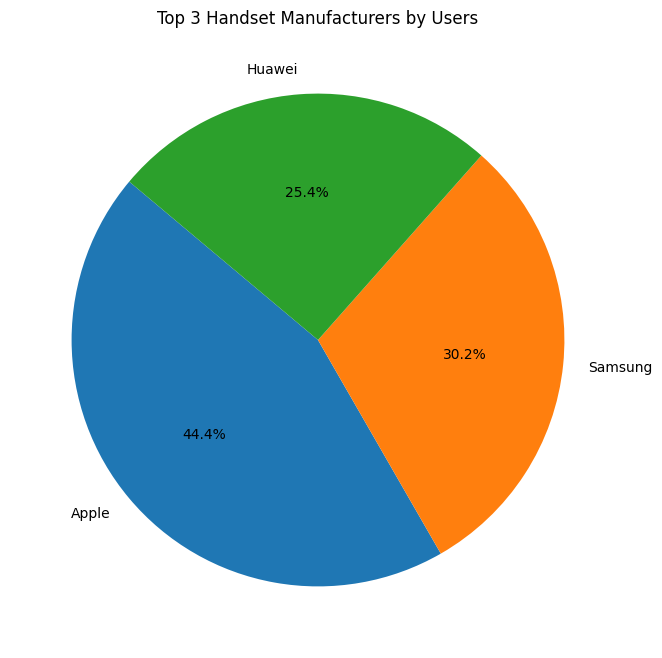

In [16]:

manufacturer_counts = df['handset_manufacturer'].value_counts().head(3)
plot.plot_pie(manufacturer_counts, title='Top 3 Handset Manufacturers by Users', label=manufacturer_counts.index)

In [17]:
manufacturer_counts

handset_manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64

c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




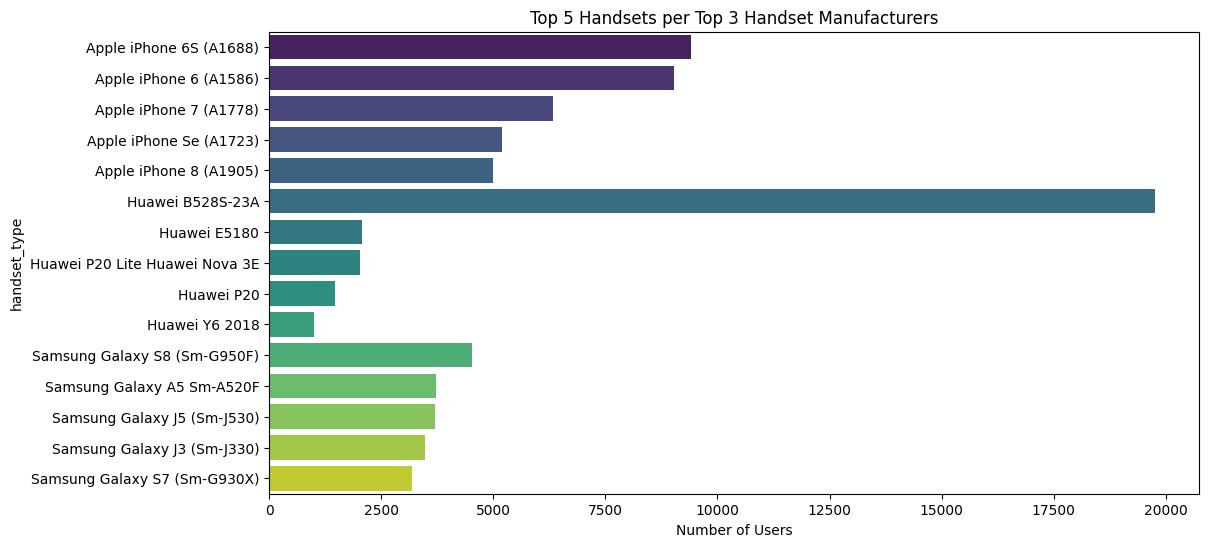

In [18]:
top_manufacturers = df['handset_manufacturer'].value_counts().head(3).index

# Filter the DataFrame to include only the top 3 manufacturers
df_top_manufacturers = df[df['handset_manufacturer'].isin(top_manufacturers)]

# Get the top 5 handsets for each manufacturer
top_handsets_per_manufacturer = (
    df_top_manufacturers
    .groupby('handset_manufacturer')['handset_type']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
    .reset_index(name='Count')
)

plot.plot_bar(x=top_handsets_per_manufacturer['Count'], y=top_handsets_per_manufacturer['handset_type'], xlabel='Number of Users', title='Top 5 Handsets per Top 3 Handset Manufacturers',ylabel='handset_type',palette='Blues_d')

## Recommendations for Marketing Teams
- Target Popular Handsets: With more clarity in the dataset, marketing teams can focus on the most popular handset types for promotions and campaigns.
- Cross-Brand Promotions: Since Apple, Samsung, and Huawei remain the top manufacturers, consider campaigns that cater to users from all three brands.
- User Demographics: Given the popularity of iPhone models, the marketing team can analyze demographic patterns to target specific age groups or regions.
- Device-Specific Marketing: The updated data allows for more accurate targeting based on specific handset models, improving campaign effectiveness.

In [19]:
unique_user_id = 'msisdn/number'

# Aggregate the required information by user
aggregated_data = df.groupby(unique_user_id).agg({
    'bearer_id': 'count',  # Number of xDR sessions
    'dur._(ms)': 'sum',  # Session duration
    'total_dl_(bytes)': 'sum',  # Total download data
    'total_ul_(bytes)': 'sum',  # Total upload data
})

# Rename the columns for clarity
aggregated_data.columns = [
    'number_of_xdr_sessions',  # Number of xDR sessions
    'total_session_duration',  # Total session duration
    'total_download_data',  # Total download data
    'total_upload_data',  # Total upload data
]

# Calculate the total data volume for each user
aggregated_data['total_data_volume'] = (
    aggregated_data['total_download_data'] + aggregated_data['total_upload_data']
)

aggregated_data.head()  

,number_of_xdr_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume
msisdn/number,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09
3.360101e+10,2,253983.0,5.552080e+08,60009249.0,6.152172e+08


## Overview of the aggregated information for each user:

- Number of xDR sessions: Represents the total number of sessions for each user.
- Session duration: Total duration of sessions (in milliseconds) for each user.
- Total download (DL) and upload (UL) data: Total data downloaded and uploaded by each user.
- Total data volume: Sum of total download and total upload data for each user.

In [20]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


In [21]:
aggregated_data['number_of_xdr_sessions'].describe()

count    100187.000000
mean          1.407508
std           3.290613
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1011.000000
Name: number_of_xdr_sessions, dtype: float64

calculate the average session duration for each user. 

In [22]:
# Calculate the average session duration for each user
aggregated_data['average_session_duration'] = aggregated_data['total_session_duration'] / aggregated_data['number_of_xdr_sessions']

# Display the updated data with the average session duration
aggregated_data.head()  # Show the first few rows with the average session duration


,number_of_xdr_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume,average_session_duration
msisdn/number,,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08,116720.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08,181230.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08,49878.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09,18552.0
3.360101e+10,2,253983.0,5.552080e+08,60009249.0,6.152172e+08,126991.5


In [23]:
# Aggregate total data volume by specific application categories
category_columns = [
    'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
    'google_dl_(bytes)', 'google_ul_(bytes)',
    'email_dl_(bytes)', 'email_ul_(bytes)',
    'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
    'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
    'gaming_dl_(bytes)', 'gaming_ul_(bytes)',
    'other_dl_(bytes)', 'other_ul_(bytes)'
]

# Create a new dataframe to store the aggregated data volume for each category
category_data = df.groupby(unique_user_id)[category_columns].sum()

# Rename columns for clarity
category_data.columns = [
    'social_media_dl', 'social_media_ul',
    'google_dl', 'google_ul',
    'email_dl', 'email_ul',
    'youtube_dl', 'youtube_ul',
    'netflix_dl', 'netflix_ul',
    'gaming_dl', 'gaming_ul',
    'other_dl', 'other_ul'
]

# Calculate the total data volume for each category
category_data['social_media_total'] = category_data['social_media_dl'] + category_data['social_media_ul']
category_data['google_total'] = category_data['google_dl'] + category_data['google_ul']
category_data['email_total'] = category_data['email_dl'] + category_data['email_ul']
category_data['youtube_total'] = category_data['youtube_dl'] + category_data['youtube_ul']
category_data['netflix_total'] = category_data['netflix_dl'] + category_data['netflix_ul']
category_data['gaming_total'] = category_data['gaming_dl'] + category_data['gaming_ul']
category_data['other_total'] = category_data['other_dl'] + category_data['other_ul']

# Display the first few rows of the updated data with total data volume by category
category_data.head()  # Show the total data volume for each application category


,social_media_dl,social_media_ul,google_dl,google_ul,email_dl,email_ul,youtube_dl,youtube_ul,netflix_dl,netflix_ul,...,gaming_ul,other_dl,other_ul,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
msisdn/number,,,,,,,,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,...,1367528.0,377096990.0,9473882.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,...,14714780.0,279557701.0,2152370.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,...,3051292.0,25248001.0,10031701.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,...,5816727.0,777643713.0,27160771.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
3.360101e+10,3787122.0,5790.0,11993496.0,3269638.0,6513834.0,1334762.0,12169742.0,22177380.0,14569029.0,15746472.0,...,5461038.0,480358608.0,12014169.0,3792912.0,15263134.0,7848596.0,34347122.0,30315501.0,5.116358e+08,492372777.0


## Non-Graphical Univariate Analysis to compute dispersion parameters for each quantitative variable and provide useful interpretations

In [24]:
basic_metrics = df.describe().T

In [25]:
# Calculate dispersion parameters for each quantitative variable
dispersion_parameters = pd.DataFrame({
    'range': basic_metrics['max'] - basic_metrics['min'],
    'variance': basic_metrics['std'] ** 2,
    'interquartile_range': basic_metrics['75%'] - basic_metrics['25%']
})

# Display the dispersion parameters
dispersion_parameters  # Show range, variance, and interquartile range for each quantitative variable


,range,variance,interquartile_range
bearer_id,6.269004e+18,8.364967e+36,5.692543e+18
start_ms,9.990000e+02,8.333286e+04,4.990000e+02
end_ms,9.990000e+02,8.306442e+04,4.990000e+02
dur._(ms),1.852194e+06,6.272113e+09,7.316375e+04
imsi,1.002719e+13,4.890647e+20,3.702059e+08
msisdn/number,8.823635e+14,6.326445e+24,3.123169e+07
imei,9.856119e+13,4.996690e+26,5.063249e+13
avg_rtt_dl_(ms),9.692300e+04,3.296084e+05,2.800000e+01
avg_rtt_ul_(ms),7.120000e+03,5.891006e+03,8.000000e+00
avg_bearer_tp_dl_(kbps),3.781600e+05,5.793379e+08,2.049275e+04


## Non-Graphical Univariate Analysis
Analysis of the dispersion parameters for each quantitative variable:

- Range: Difference between maximum and minimum values.
- Variance: Measures the spread or dispersion of the data.
- Interquartile Range (IQR): Indicates the spread between the 25th and 75th percentiles.

These parameters help understand data variability, indicating the range of possible values and highlighting potential outliers.

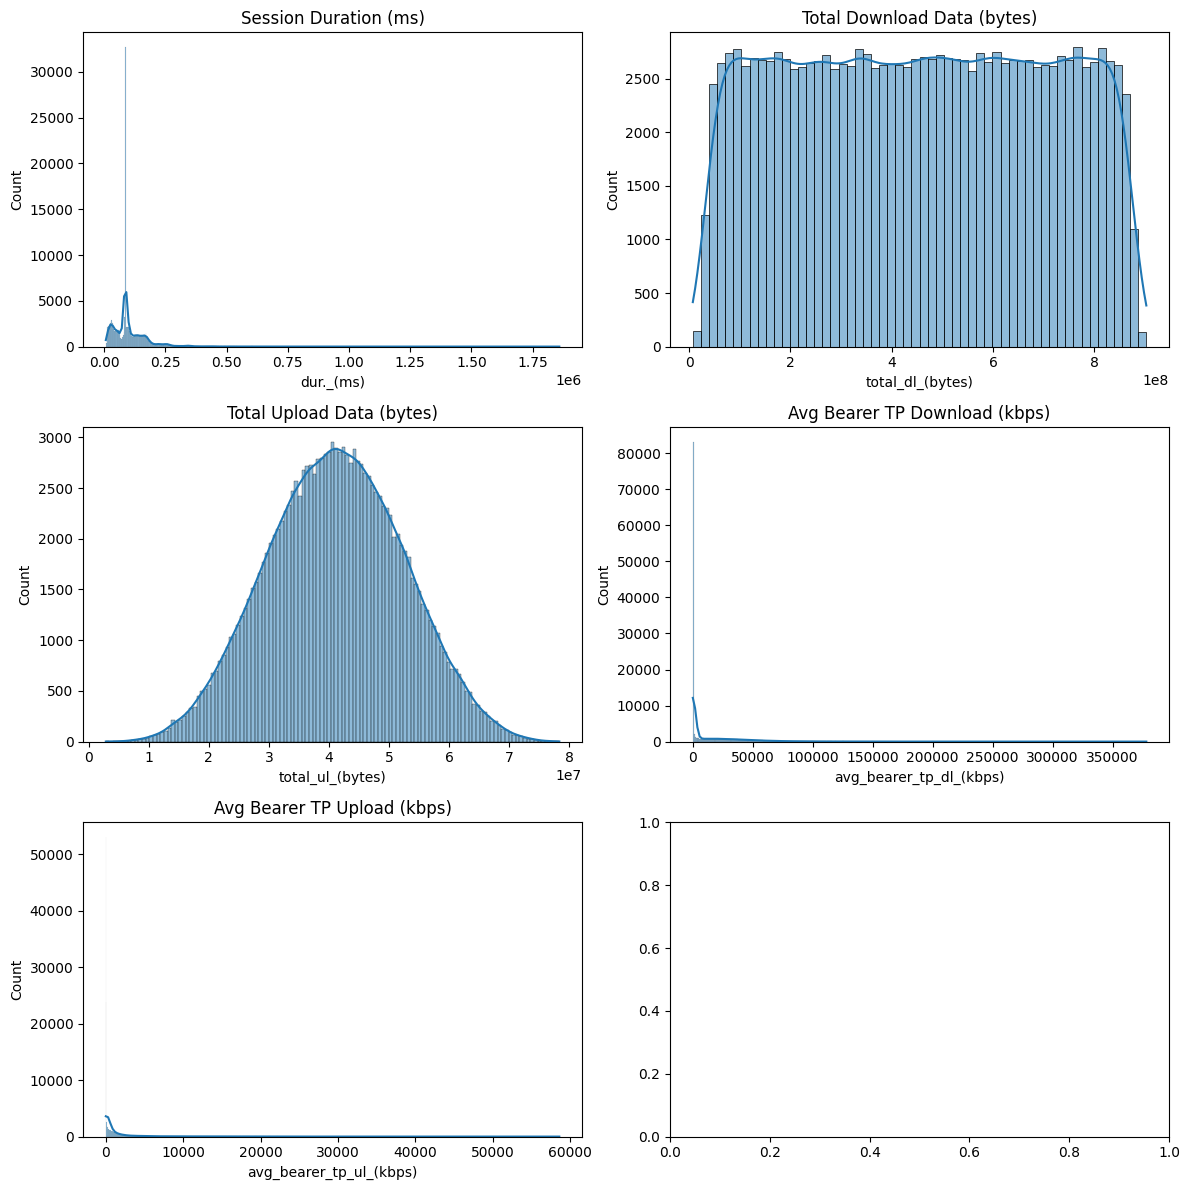

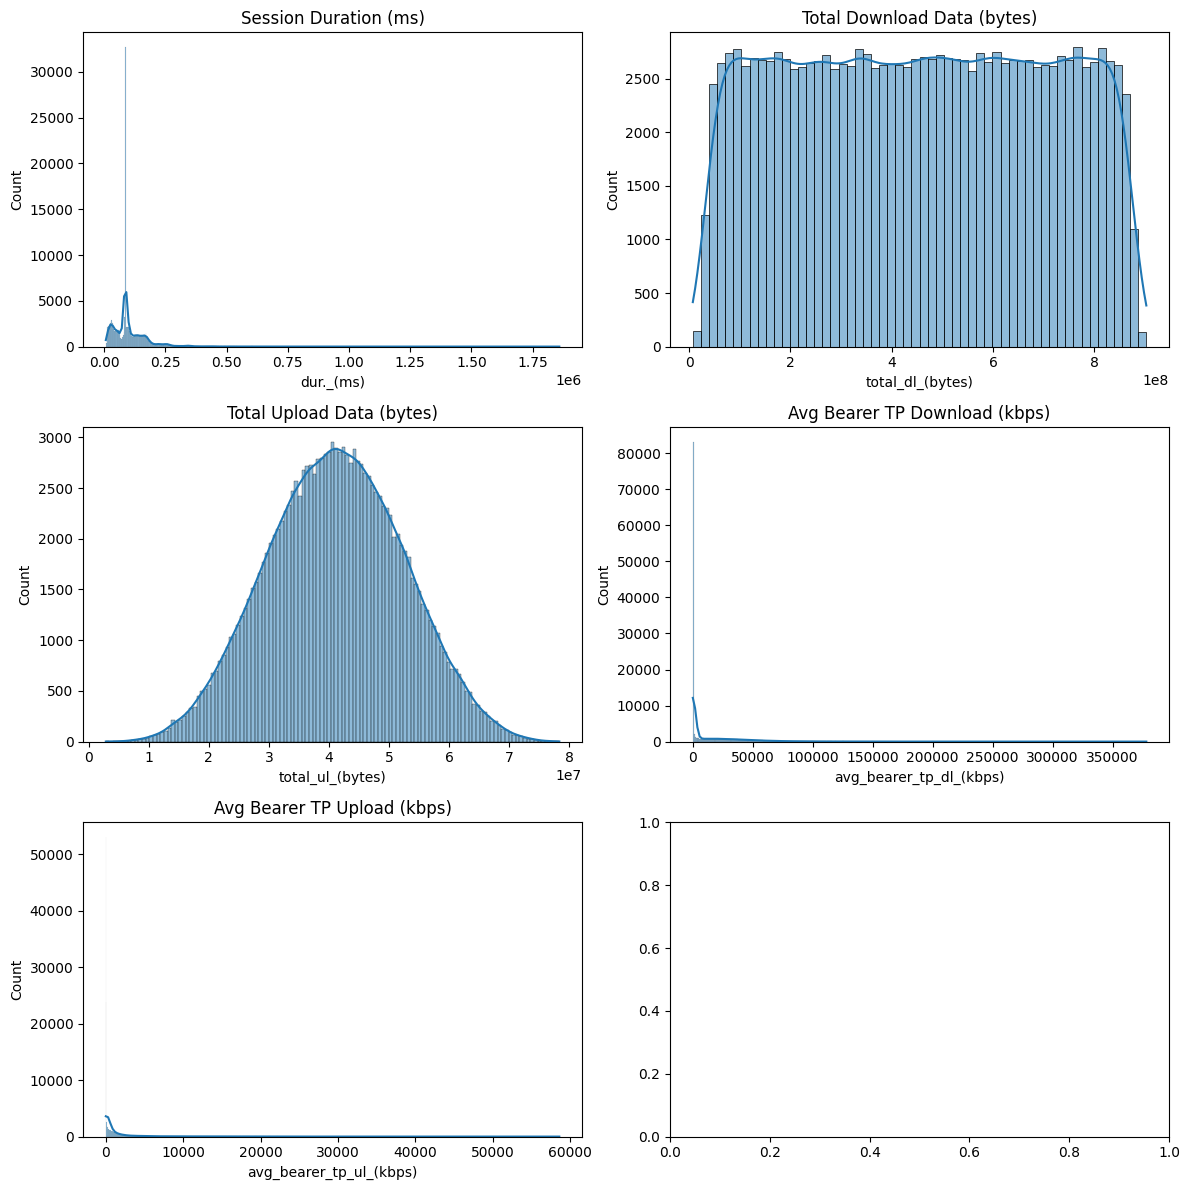

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for the key numerical variables
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot histograms for selected variables
sns.histplot(df['dur._(ms)'], kde=True, ax=axs[0, 0]).set(title='Session Duration (ms)')
sns.histplot(df['total_dl_(bytes)'], kde=True, ax=axs[0, 1]).set(title='Total Download Data (bytes)')
sns.histplot(df['total_ul_(bytes)'], kde=True, ax=axs[1, 0]).set(title='Total Upload Data (bytes)')
sns.histplot(df['avg_bearer_tp_dl_(kbps)'], kde=True, ax=axs[1, 1]).set(title='Avg Bearer TP Download (kbps)')
sns.histplot(df['avg_bearer_tp_ul_(kbps)'], kde=True, ax=axs[2, 0]).set(title='Avg Bearer TP Upload (kbps)')
# sns.histplot(df[unique_user_id], kde=True, ax=axs[2, 1]).set(title='IMSI')

# Adjust layout
plt.tight_layout()

# Return the histogram plot
fig  # Output the histogram plot for graphical univariate analysis


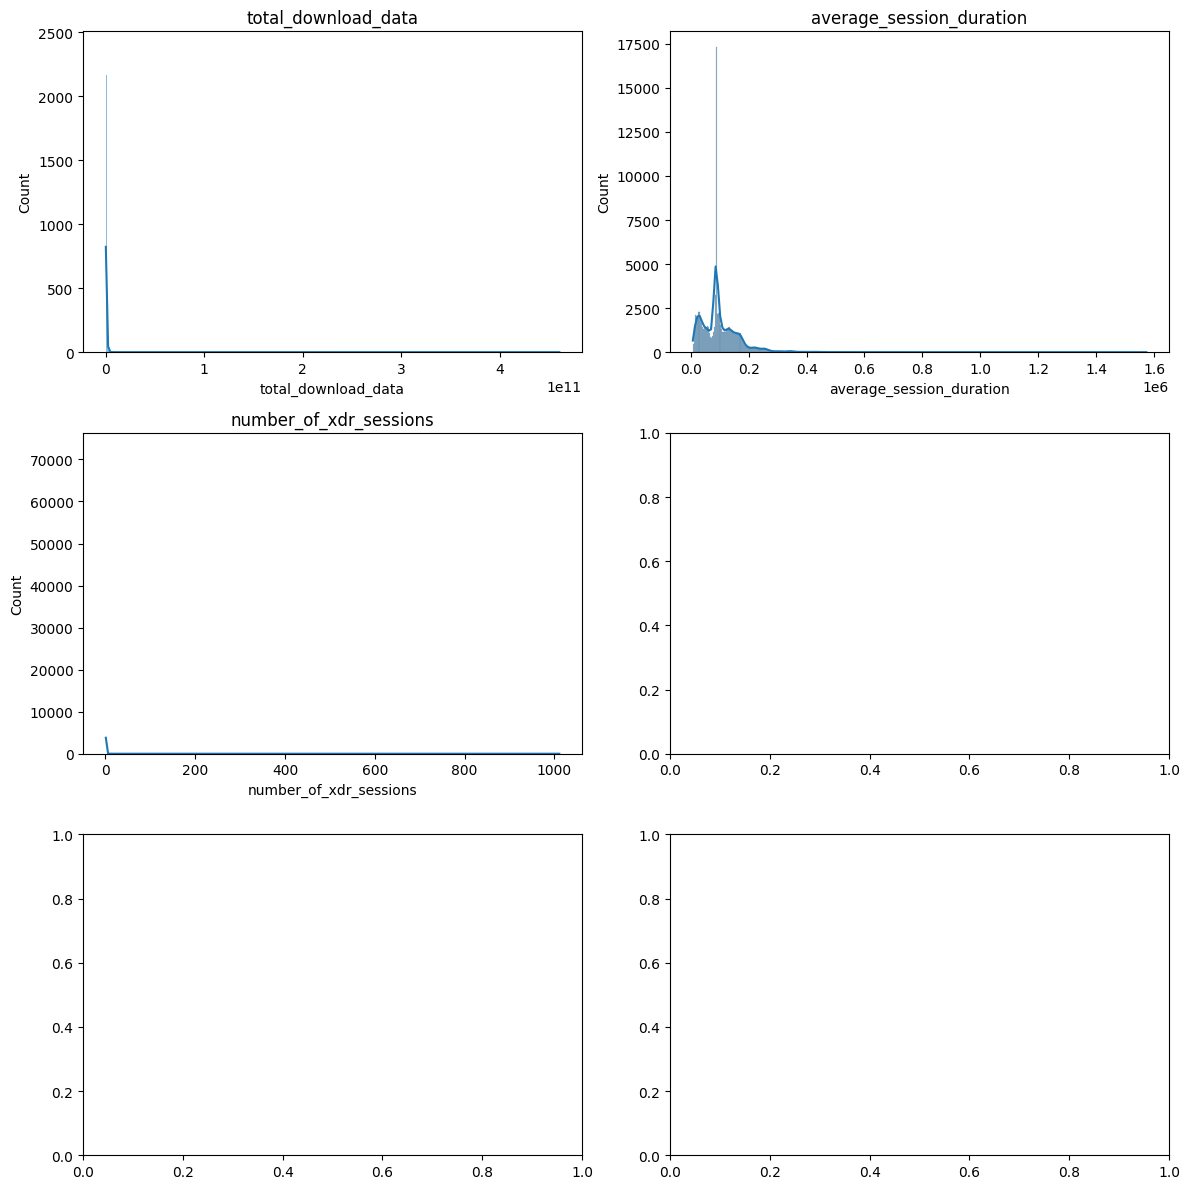

Error in callback <function _draw_all_if_interactive at 0x0000020B86A58AE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

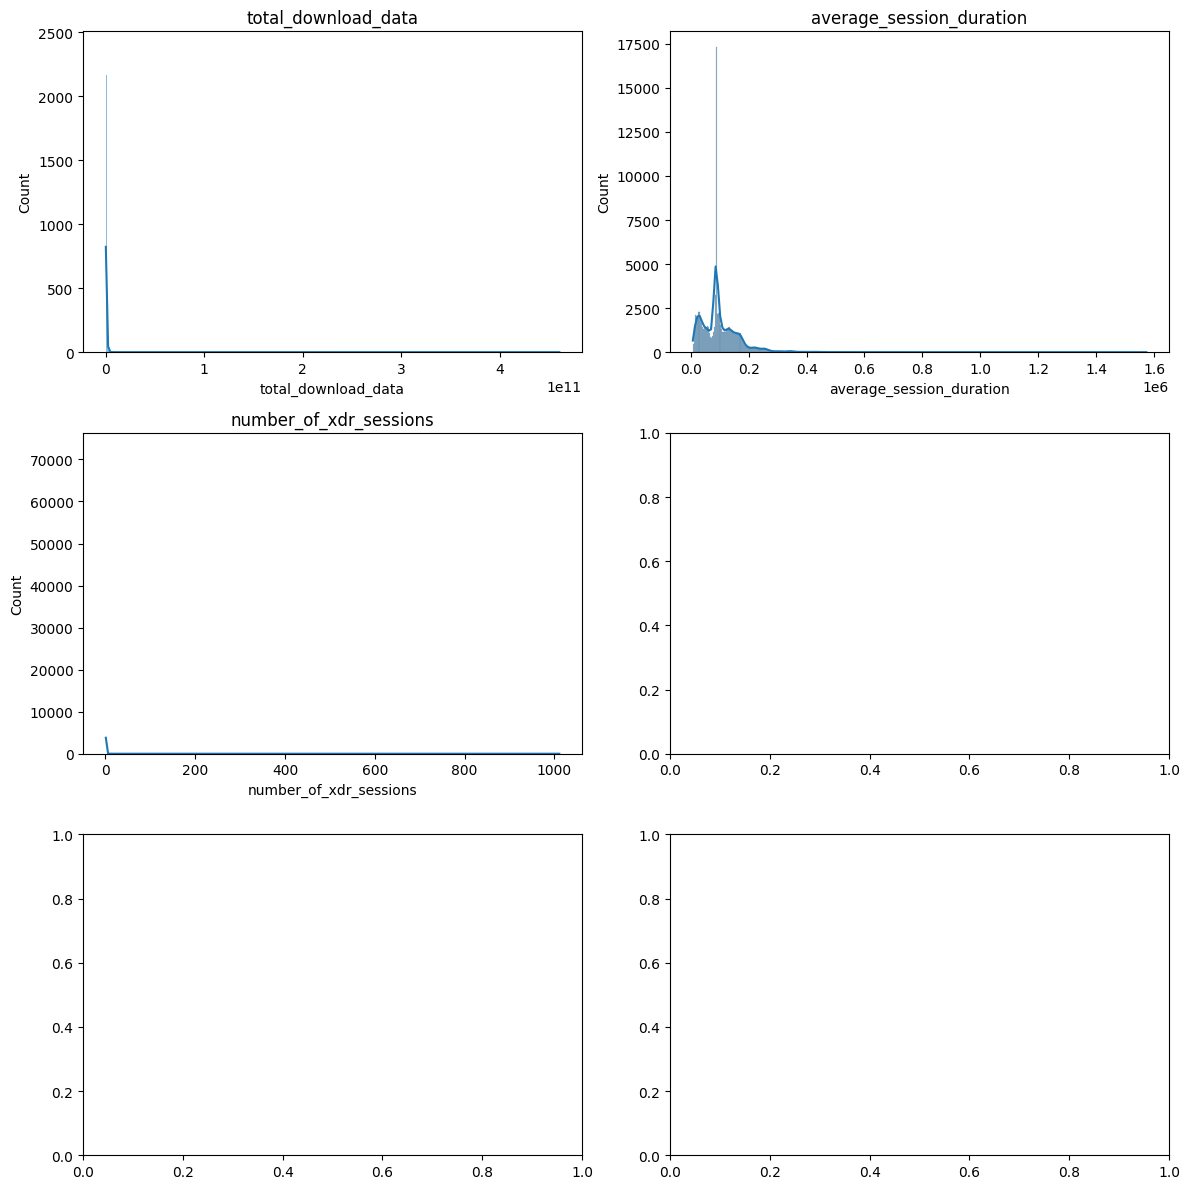

In [27]:
# Create histograms for the key aggregated variables
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot histograms for selected variables
sns.histplot(aggregated_data['total_download_data'], kde=True, ax=axs[0, 0]).set(title='total_download_data')
sns.histplot(aggregated_data['average_session_duration'], kde=True, ax=axs[0, 1]).set(title='average_session_duration')
sns.histplot(aggregated_data['number_of_xdr_sessions'], kde=True, ax=axs[1, 0]).set(title='number_of_xdr_sessions')
# sns.histplot(aggregated_data['total_data_volume'], kde=True, ax=axs[1, 1]).set(title='total_data_volume)')
# sns.histplot(aggregated_data['total_session_duration'], kde=True, ax=axs[2, 0]).set(title='total_session_duration')
# sns.histplot(aggregated_data['total_upload_data'], kde=True, ax=axs[2, 0]).set(title='total_upload_data')
# sns.histplot(df[unique_user_id], kde=True, ax=axs[2, 1]).set(title='IMSI')

# Adjust layout
plt.tight_layout()

# Return the histogram plot
fig  # Output the histogram plot for graphical univariate analysis

In [28]:
# Calculate deciles for the total duration (in milliseconds) for all sessions
df['total_duration'] = df['activity_duration_dl_(ms)'] + df['activity_duration_ul_(ms)']

# Segment into top five decile classes based on total duration
df['duration_decile'] = pd.qcut(df['total_duration'], 10, labels=False)  # 10 deciles
top_5_deciles = df[df['duration_decile'] >= 5]  # Top five decile classes

# Calculate the total data (DL+UL) per decile class
top_5_data_usage = top_5_deciles.groupby('duration_decile').agg({
    'total_dl_(bytes)': 'sum',
    'total_ul_(bytes)': 'sum'
})

# Compute the total data (DL + UL)
top_5_data_usage['total_data'] = top_5_data_usage['total_dl_(bytes)'] + top_5_data_usage['total_ul_(bytes)']

top_5_data_usage  # Result showing total data per decile class


,total_dl_(bytes),total_ul_(bytes),total_data
duration_decile,,,
5,6.380314e+12,5.809540e+11,6.961268e+12
6,6.424314e+12,5.782679e+11,7.002582e+12
7,6.382218e+12,5.813510e+11,6.963569e+12
8,6.413975e+12,5.802809e+11,6.994256e+12
9,6.387909e+12,5.817762e+11,6.969685e+12


## Insights and Recommendations
The total data usage is relatively consistent across the top five decile classes, indicating a similar level of data usage.
The slight variations in data could be due to other factors like network conditions, data plan limitations, or device capabilities.
Given the similarity in data usage across deciles, focus on user behavior, device types, or geographic regions to gain further insights into data consumption.

## The next step is to compute a correlation matrix for social media data, Google data, email data, YouTube data, Netflix data, gaming data, and other data, then interpret the findings. 

In [29]:
# Select the relevant columns for the correlation analysis
correlation_columns = [
    'social_media_dl_(bytes)',
    'social_media_ul_(bytes)',
    'google_dl_(bytes)',
    'google_ul_(bytes)',
    'email_dl_(bytes)',
    'email_ul_(bytes)',
    'youtube_dl_(bytes)',
    'youtube_ul_(bytes)',
    'netflix_dl_(bytes)',
    'netflix_ul_(bytes)',
    'gaming_dl_(bytes)',
    'gaming_ul_(bytes)',
    'other_dl_(bytes)',
    'other_ul_(bytes)'
]

# Create a correlation matrix for the specified columns
correlation_matrix = df[correlation_columns].corr()

correlation_matrix  # Display the correlation matrix


,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes)
social_media_dl_(bytes),1.000000,-0.001527,-0.002966,0.001228,0.003542,-0.002451,-0.002087,0.003237,-0.001974,0.002897,0.000386,0.002800,0.006019,0.000864
social_media_ul_(bytes),-0.001527,1.000000,0.003802,0.001659,0.003496,-0.002063,-0.002567,-0.002974,0.000541,-0.001966,-0.000705,0.000562,-0.003852,0.000952
google_dl_(bytes),-0.002966,0.003802,1.000000,-0.000526,0.000565,0.001372,0.002608,-0.000024,0.000833,-0.000563,-0.001730,-0.001427,-0.003078,-0.001078
google_ul_(bytes),0.001228,0.001659,-0.000526,1.000000,-0.001623,-0.002354,-0.000121,0.001569,-0.000775,-0.004679,0.001127,-0.002500,0.000324,-0.001643
email_dl_(bytes),0.003542,0.003496,0.000565,-0.001623,1.000000,0.003110,-0.000126,-0.005252,0.002019,-0.000673,0.000870,-0.003847,-0.000395,0.005042
email_ul_(bytes),-0.002451,-0.002063,0.001372,-0.002354,0.003110,1.000000,-0.000908,-0.007891,0.000219,0.000099,-0.003306,0.006200,-0.004108,-0.000591
youtube_dl_(bytes),-0.002087,-0.002567,0.002608,-0.000121,-0.000126,-0.000908,1.000000,0.002055,0.000872,0.002616,-0.000993,-0.002467,0.002747,-0.006188
youtube_ul_(bytes),0.003237,-0.002974,-0.000024,0.001569,-0.005252,-0.007891,0.002055,1.000000,-0.000551,0.003343,-0.002471,0.000776,0.001018,-0.000252
netflix_dl_(bytes),-0.001974,0.000541,0.000833,-0.000775,0.002019,0.000219,0.000872,-0.000551,1.000000,-0.000381,-0.003153,-0.000050,-0.006183,-0.003810
netflix_ul_(bytes),0.002897,-0.001966,-0.000563,-0.004679,-0.000673,0.000099,0.002616,0.003343,-0.000381,1.000000,-0.002789,-0.004182,-0.006872,-0.003283


In [31]:
correlation_matrix.describe()

,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes)
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.072141,0.071097,0.071271,0.070835,0.071909,0.070523,0.071103,0.070899,0.070543,0.070255,0.070362,0.070680,0.070261,0.070493
std,0.267070,0.267367,0.267314,0.267438,0.267138,0.267543,0.267367,0.267433,0.267525,0.267616,0.267573,0.267494,0.267622,0.267547
min,-0.002966,-0.003852,-0.003078,-0.004679,-0.005252,-0.007891,-0.006188,-0.007891,-0.006183,-0.006872,-0.003306,-0.005096,-0.006872,-0.006188
25%,-0.001862,-0.002039,-0.001340,-0.001638,-0.000603,-0.002427,-0.001814,-0.001991,-0.001674,-0.003159,-0.002464,-0.002628,-0.003659,-0.002873
50%,0.001046,-0.000082,-0.000275,-0.000323,0.000718,-0.000749,-0.000123,0.000376,-0.000215,-0.000618,-0.001073,-0.000739,-0.001418,-0.000834
75%,0.003152,0.001482,0.001238,0.001203,0.003400,0.001084,0.002470,0.001934,0.000760,0.001987,0.000749,0.001264,0.002315,0.000930
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),total_duration,duration_decile
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,76411.0,4
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,3728.0,0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,0.0,0
3,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,0.0,0
4,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,325995.0,6


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[correlation_columns])

# Perform PCA to reduce dimensions and identify the most significant components
pca = PCA(n_components=4)  # Reduce to four principal components
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Contribution of each original variable to the principal components
component_contribution = pd.DataFrame(
    pca.components_,
    columns=correlation_columns,
    index=[f"PC{i+1}" for i in range(4)]
)

explained_variance # Result of PCA analysis


array([0.07271518, 0.07249613, 0.07211714, 0.07198176])

In [37]:
component_contribution 

,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes)
PC1,0.338470,-0.207893,-0.239400,0.161103,-0.122350,-0.431875,0.026043,0.345461,-0.311949,-0.077482,0.043712,-0.175847,0.515680,0.188069
PC2,0.064412,0.223496,-0.062682,0.019338,0.415285,0.151711,-0.369858,-0.402735,-0.160367,-0.377353,0.115721,-0.058282,0.166780,0.484162
PC3,0.131088,-0.206790,-0.284653,0.014889,-0.306944,0.269022,-0.196309,-0.061452,-0.149054,-0.270584,0.227682,0.665437,0.060568,-0.236972
PC4,-0.313723,0.355632,0.222045,0.509356,-0.231922,-0.326667,0.007748,0.037969,0.054095,-0.453824,0.259104,-0.021662,-0.070885,-0.151144


## Interpretation
- Balanced Contribution of Principal Components: Each principal component explains a relatively equal portion of the variance in the data, suggesting that the data has multiple contributing factors with similar importance.
- Variable Contribution to PC1: Social Media Download and YouTube Upload are the strongest positive contributors to the first principal component, while Email Upload has a strong negative contribution, indicating differing patterns of behavior in these domains.
- Variable Contribution to PC3: Gaming Upload is the strongest contributor, suggesting that this variable significantly impacts the data's structure, while other variables have negative contributions indicating different behavioral trends.
- Differences in Contributions Across Principal Components: Variations in contributions across components highlight diverse factors contributing to data patterns, suggesting the need for detailed analysis of user behavior in specific segments (e.g., gaming, email, social media).
## Recommendations and Next Steps
- Focus on High-Contributing Variables: The variables with the highest contributions in each principal component may offer insights into the underlying data structure.
- Investigate Behavioral Patterns: Examine the behavior associated with significant contributors to identify any potential patterns or trends.